## Assignment
Select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

Dataset contains flight data from 2008, downloaded from http://stat-computing.org/dataexpo/2009/the-data.html

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [18]:
# flight data from 2008, narrowed to more manageable size
flights = pd.read_csv('~/Desktop/Data_Science/2008.csv')

In [19]:
flights.shape

(7009728, 29)

In [26]:
#Lots of data, take 10% sample 10%
flights = flights.iloc[0:700973, ]

In [27]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [28]:
flights.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

## Variable Selection

### Outcome Variable 
Arrival Delay ('ArrDelay')

### Categorical Variables
Day of the Week ('DayOfWeek')
Airline Carrier Company Code ('UniqueCarrier')

### Continuous Variables
Time in the Air ('AirTime')
Travel Distance ('Distance')
Departure Delay ('DepDelay')
Scheduled Elapsed Time ('CRSElapsedTime')

## Univariate Explorations

### Arrival Delay
'ArrDelay'

In [29]:
flights['ArrDelay'].describe()

count    679225.000000
mean         10.236629
std          39.397181
min         -91.000000
25%          -9.000000
50%           0.000000
75%          15.000000
max        1525.000000
Name: ArrDelay, dtype: float64

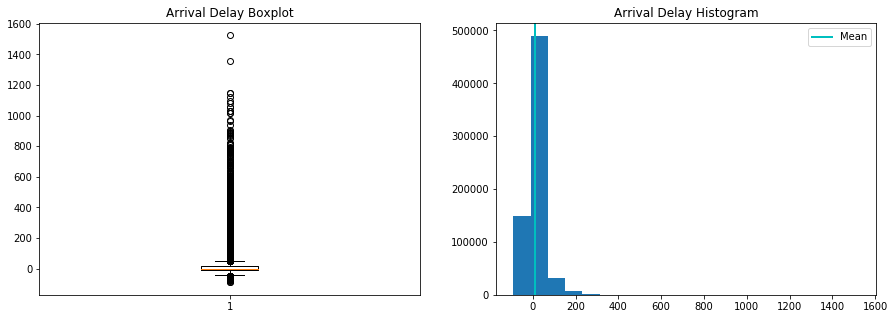

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['ArrDelay'].dropna(how = 'any'))
plt.title('Arrival Delay Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['ArrDelay'].dropna(how = 'any'), bins=20)
plt.axvline(flights['ArrDelay'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Arrival Delay Histogram')

plt.show()

### Day of the Week
'DayOfWeek'

Day of the Week applies a numeric value to each day, 1 (Monday) - 7 (Sunday)

In [49]:
print('Average number of flights per day of the week:', flights['DayOfWeek'].value_counts().mean())
print(flights['DayOfWeek'].value_counts())

Average number of flights per day of the week: 100000.0
4    116413
3    114437
2    111839
5     96510
1     95364
7     89477
6     75960
Name: DayOfWeek, dtype: int64


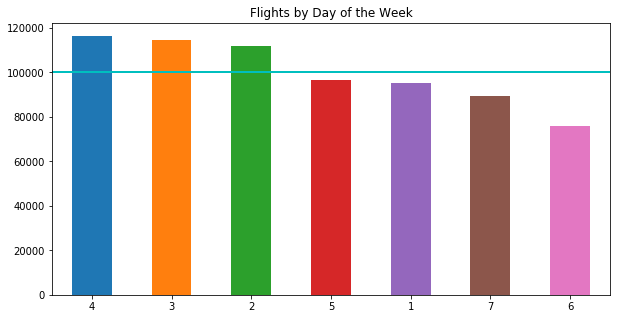

In [53]:
plt.figure(figsize=(10, 5))

plt.title('Flights by Day of the Week')
pd.value_counts(flights['DayOfWeek']).plot.bar()
plt.axhline(flights['DayOfWeek'].value_counts().mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.xticks(rotation = 0)

plt.show()

### Airline Carrier Company Code
'UniqueCarrier'

In [50]:
print('Average number of flights per Airline Carrier:', flights['UniqueCarrier'].value_counts().mean())
print(flights['UniqueCarrier'].value_counts())

Average number of flights per Airline Carrier: 35000.0
WN    190478
AA     52410
OO     48992
MQ     43454
XE     40211
US     39226
DL     38256
UA     38026
NW     30908
CO     25177
EV     23115
9E     22848
YV     22161
FL     20519
OH     18644
B6     16447
AS     12729
F9      7692
HA      4679
AQ      4028
Name: UniqueCarrier, dtype: int64


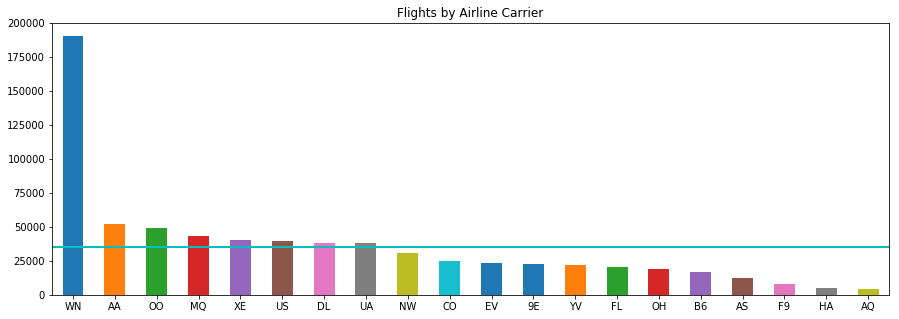

In [52]:
plt.figure(figsize=(15, 5))

plt.title('Flights by Airline Carrier')
pd.value_counts(flights['UniqueCarrier']).plot.bar()
plt.axhline(flights['UniqueCarrier'].value_counts().mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.xticks(rotation = 0)

plt.show()

### Time in the Air
'AirTime'

In [32]:
flights['AirTime'].describe()

count    679225.000000
mean        102.813183
std          66.196988
min           0.000000
25%          55.000000
50%          84.000000
75%         132.000000
max         645.000000
Name: AirTime, dtype: float64

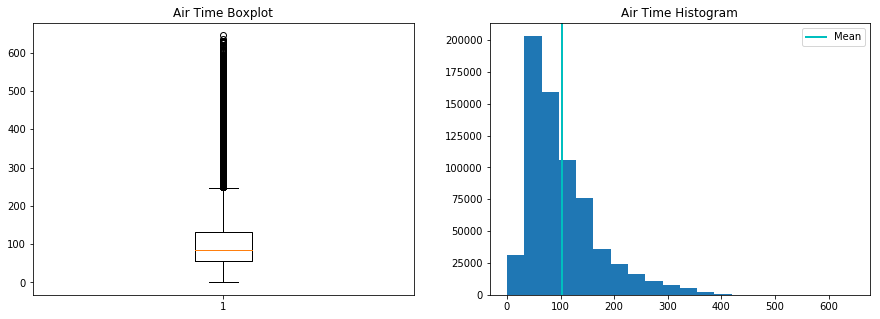

In [54]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['AirTime'].dropna(how = 'any'))
plt.title('Air Time Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['AirTime'].dropna(how = 'any'), bins=20)
plt.axvline(flights['AirTime'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Air Time Histogram')

plt.show()

### Travel Distance
'Distance'

In [33]:
flights['Distance'].describe()

count    700000.000000
mean        707.986029
std         543.848495
min          24.000000
25%         323.000000
50%         552.000000
75%         938.000000
max        4962.000000
Name: Distance, dtype: float64

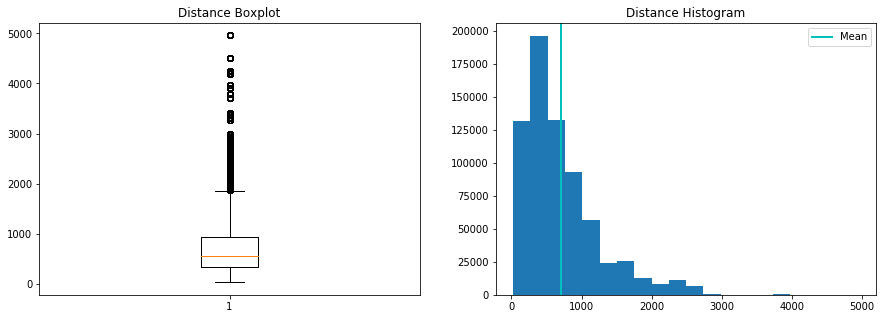

In [55]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['Distance'].dropna(how = 'any'))
plt.title('Distance Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['Distance'].dropna(how = 'any'), bins=20)
plt.axvline(flights['Distance'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Distance Histogram')

plt.show()

### Departure Delay
'DepDelay'

In [34]:
flights['DepDelay'].describe()

count    680931.000000
mean         11.945112
std          36.175970
min         -92.000000
25%          -4.000000
50%           0.000000
75%          11.000000
max        1355.000000
Name: DepDelay, dtype: float64

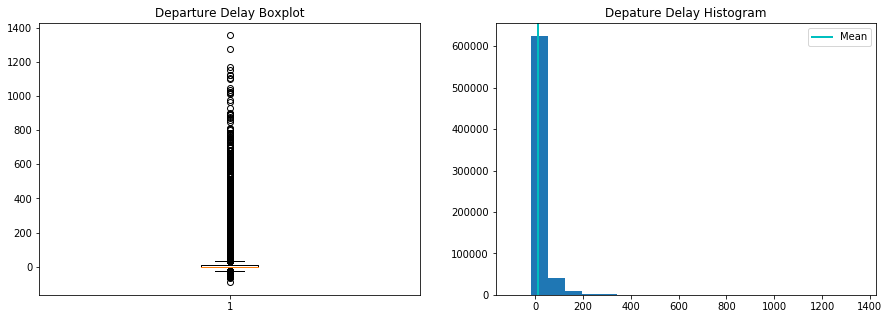

In [56]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['DepDelay'].dropna(how = 'any'))
plt.title('Departure Delay Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['DepDelay'].dropna(how = 'any'), bins=20)
plt.axvline(flights['DepDelay'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Depature Delay Histogram')

plt.show()

### Scheduled Elapsed Time
'CRSElapsedTime'

In [35]:
flights['CRSElapsedTime'].describe()

count    699894.000000
mean        126.717414
std          68.425230
min           1.000000
25%          77.000000
50%         109.000000
75%         157.000000
max        1435.000000
Name: CRSElapsedTime, dtype: float64

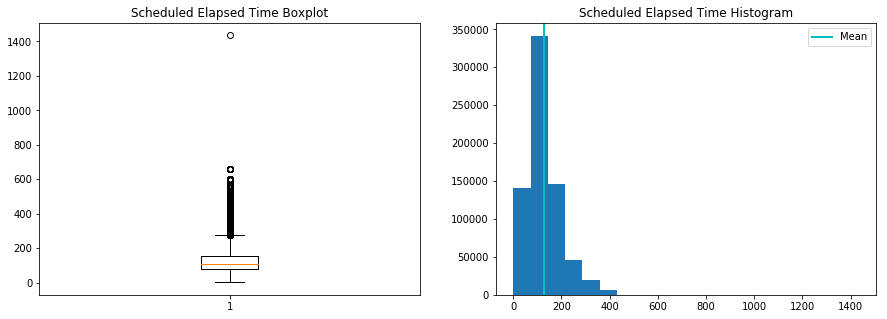

In [57]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(flights['CRSElapsedTime'].dropna(how = 'any'))
plt.title('Scheduled Elapsed Time Boxplot')

plt.subplot(1, 2, 2)
plt.hist(flights['CRSElapsedTime'].dropna(how = 'any'), bins=20)
plt.axvline(flights['CRSElapsedTime'].mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right')
plt.title('Scheduled Elapsed Time Histogram')

plt.show()